<div class="clearfix" style="padding: 10px; padding-left: 0px">
<a href="https://www.unicamp.br/"><img src="http://www.fee.unicamp.br/sites/all/themes/theme537/images/unicamp.png" width="100px" style="display: inline-block; margin-top: 5px;"></a>
<a href="https://www.fee.unicamp.br/"><img src="http://www.fee.unicamp.br/sites/default/files/imagens/logo_feec_50anos_juntos.png" width="150px" class="pull-right" style="display: inline-block; margin: 0px;"></a>
</div>

## IE325Z - Introdução à Confiabilidade de Materiais e Dispositivos
## Lista 1 - Exercício 9

<br>

|Alunos   	|RA   	|e-mail   	|
|:-:	|:-:	|:-:	|
|Patricia Henriques Nallin  	|103717   	|patricia.nallin@gmail.com   	| 
|Mauricio Martins Donatti  	|092374   	|mmdonatti@gmail.com   	| 



|Professor     	|e-mail   	|
|:-:	|:-:	|
|Prof. Roberto Lacerda de Orio | orio@dsif.fee.unicamp.br |

### Instruções de Uso

Para rodar um trecho de código:

1. Clique para selecionar a célula
2. Aperte `SHIFT+ENTER` no teclado ou clique no botão (<button class='fa fa-play icon-play btn btn-xs btn-default'></button>) na barra superior da página.

### Enunciado
<br>
<div style="text-align: justify">Testes de corrosão num metal geraram os seguintes dados em horas:</div>

|       |60% RH|70% RH|80% RH|
|:-:	|:-:	                    |:-:	                   |:-:	                      |
|25°C|-|824|-|
|50°C|332|100|30|
|75°C|-|16.4|-|


<br><div style="text-align: justify">Determine  o  parâmetro $\gamma$ do  modelo  exponencial  para  a  umidade  e  a  energia  de ativação do mecanismo de falha
</div>

---

In [14]:
import numpy as np
import notebook_importer
from modules import IE325
import matplotlib.pyplot as plt

Tcte_hours = [332, 100, 30]
Tcte_Humidity = [60, 70, 80]
Tcte = 50 + 273

Scte_temp = [25+273, 50+273, 75+273]
Scte_hours = [824, 100, 16.4]
Scte = 70

TF_EL = IE325.TF_ExponentialLaw('all',Tcte_hours,Tcte_Humidity, Tcte, Scte_hours, Scte_temp, Scte)

Equação característica exponencial para o tempo de falha, em função da temperatura e do stress aplicado:


** $TF(T,\xi) = B_o.exp(-\xi.\gamma).exp(\frac {Q}{kT})$ **

---
##### Gamma
Para uma temperatura T constante, pode-se linearizar:

$TF(T_{cte},\xi) = c.exp(-\xi.\gamma)  \Rightarrow   ln(TF(T_{cte},\xi)) = ln(c) - \gamma.\xi  $

onde $c = B_o.exp(\frac{Q}{kT})$

E encontrar o valor de ** *gamma* **.



In [2]:
print("\nGamma: " + str(TF_EL.gamma))


Gamma: 0.120196879363



---

##### Energia de Ativação Q

Do mesmo modo, para um stress csi constante, lineariza-se:

$TF(T,\xi_{cte}) = c.exp(\frac{Q}{kT})  \Rightarrow   ln(TF(T,\xi_{cte})) = ln(c) + \frac {Q}{k}.\overline{T}  $

onde $\overline{T} = T^{-1}$ e $c = B_o.exp(-\gamma.\xi)$

E encontrar o valor de ** *Q* **.



In [3]:
print("Energia de Ativação Q: " + str(TF_EL.Q) + " eV\n")

Energia de Ativação Q: 7.00030593668 eV



---

##### Constante Bo e lei de regimento exponencial do Tempo de Falha

Tendo esses dois valores, encontra-se a constante ** *Bo* ** da lei e o regimento do Tempo de Falha (TF - Time to Failure) pode ser escrito.

In [4]:
print("Bo: " + str(TF_EL.Bo))

print("\n\nLei de Regimento do Tempo de Falha:")
print(TF_EL.Law(2))

Bo: 5.37599665364e-06


Lei de Regimento do Tempo de Falha:
TF(csi, T) = 5.38e-06.exp(-1.20e-01.csi).exp(8.12e+03/T)


---

##### Tempo de Falha - Variação da umidade em diferentes temperaturas

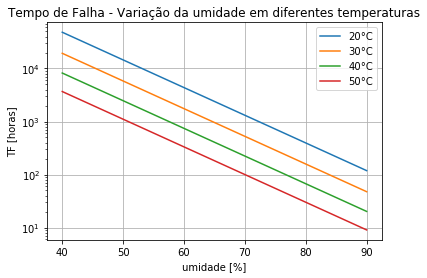

In [13]:
umidade = [40,50,60,70,80,90]

# ----- Plot    
plt.plot(umidade,TF_EL.Find_TF(umidade,20+273),
         umidade,TF_EL.Find_TF(umidade,30+273), 
         umidade,TF_EL.Find_TF(umidade,40+273), 
         umidade,TF_EL.Find_TF(umidade,50+273))
plt.title('Tempo de Falha - Variação da umidade em diferentes temperaturas')
plt.legend(['20°C','30°C','40°C','50°C'])
plt.xlabel('umidade [%]')
plt.ylabel('TF [horas]')
plt.yscale('log')
plt.grid()
fig = plt.gcf()
plt.show()

---

##### Tempo de Falha - Variação da temperatura em diferentes umidades

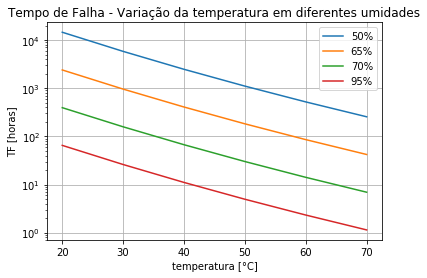

In [12]:
temperatura = [20+273,30+273,40+273,50+273,60+273,70+273]
temperaturaC = [20,30,40,50,60,70]


# ----- Plot    
plt.plot(temperaturaC,TF_EL.Find_TF(50,temperatura),
         temperaturaC,TF_EL.Find_TF(65,temperatura), 
         temperaturaC,TF_EL.Find_TF(80,temperatura), 
         temperaturaC,TF_EL.Find_TF(95,temperatura))
plt.title('Tempo de Falha - Variação da temperatura em diferentes umidades')
plt.legend(['50%','65%','70%','95%'])
plt.xlabel('temperatura [°C]')
plt.ylabel('TF [horas]')
plt.yscale('log')
plt.grid()
fig = plt.gcf()
plt.show()

---
##### Constantes Associadas

In [6]:
print(TF_EL.Variables())

-----
Linear Fit Variables - Exponential Law

Finding gamma
a (slope coef) = -0.120196879363
b (intercept coef) = 13.0176157342
Correlation coefficient = -0.9999995367
Standard error = 0.000115701611646

Finding Activation Energy (Q)
a (slope coef) = 8123.8318866
b (intercept coef) = -20.5466951967
Correlation coefficient = 0.99999995438
Standard error = 2.45387309193


-----
Time to Failure Variables - Exponential Law
gamma = 0.120196879363
Q = 7.00030593668 [eV]
Bo = 5.37599665364e-06


